# <h2 align="center">"Project YouTube"</h2> <br />
# <h2 align="center">Capstone Project</h2> <br />
# <h2 align="center">Ian Perry</h2> <br />

  

###  Review executive summary, audience, goals, criteria:
The mission of this project is to predict which types of documentaries perform best on youtube based on a designated keyword.  I have taken a number of keywords  (often referred to as key phrases).

Things to investigate

Which types of documentary perform best based on views
Which types of documentary  have the highest ratio of likes to dislikes

Stages
1) Collect data
2) EDA
3) Visulise findings
4) Model selection
5) Present results

1)  The data has been sourced from YouTube via a third party collection mechanism.  I have taken 192 keywords based on words related to the term Documentary from the Google keyword planner.  Each keyword has the highest ranked 20 videos.  This has resulted of a dataset containing 3810 records.  

2)  These keywords have been imported into pandas via CSV uploader. I have cleaned the data to house the records in a format fit for analysis.

3) A number of graphical representations will be produced to spot trends.

4)  I will use a linear regression model to predict the best types of documentaries that can be created to get the most views.  Then I will use a NLTK model to predict classification of the videos title.

Success criteria:   My measure of success is based upon collating a list of popular keywords that I can give to my sponsor who will then decide if there is a market for documentaries in this area.

The intended audience for this should it go into production would be film makers and copywriters who are the decision makers into which topics that are popular with audiences.


Supplementary notes - 
Each keyword contains the top 20 ranked videos within YouTube as of 11 December 2016.  

## Table of Contents (click on link to go to)

*[Data Dictionary](#Section1) <br />
*[EDA](#Section2)<br />
*[Time Manipulation](#Section3)<br />
*[Formating Changes](#Section4)<br />
*[Further Analysis](#Section5)<br />
*[Visualisations](#Section6)<br />
*[Outliers](#Section7)<br />
*[Other Noticable Discoveries](#Section8)<br />
*[Linear Models](#Section9)<br />
*[Text Analysis](#Section10)<br />
*[Word Cloud](#Section11)<br />
*[NLP Classifer](#Section12)<br />
*[Logistic Regression Model](#Section13)<br />
*[Bayes Model](#Section14)<br />
*[TfidTransform](#Section15)<br />
*[Review Performance](#Section16)<br />
*[Create targeted recommendations and next steps](#Section17)<br />







In [1]:
#import warnings
import warnings
warnings.simplefilter(action = "ignore")

In [2]:
# Import required modules
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from datetime import timedelta
from scipy import stats

pd.set_option('display.max_columns', None)


In [3]:
#Import styles
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [4]:
# Read files

In [88]:
allFiles =glob.glob( "../../Documentaries2//"+"/*.csv")
frame = pd.DataFrame()
for file_ in allFiles:
    df = pd.read_csv(file_)
    df["keyword"]=file_.replace("../../Documentaries2/YT-Top-Videos-", "").replace(".csv", "")
    frame= pd.concat([frame, df], ignore_index=True)

In [89]:
frame.shape

(3810, 206)

In [90]:
# Create a Data Dictionary.

### <a id="Section1">Data Dictionary</a>
totalcomments| How many comments the video received in total | Ordinal <br />
Description | A brief description of what the video contains | Continuous <br />
Duration | How long the the vide is in hh:ss:mm | Categorical <br />
Title | What the video is called | Ordinal <br />
URL | Musical classification | Categorical <br />
Upload Date | Date the video was posted to YouTube | Ordinal <br />
User | The name of the creator of the video | Ordinal <br />
Views | The total number of views to date | Continuous <br />
Category |Defined category that is assigned to the video|  Categorical <br />
Likes |How many likes the video has received to date| Continuous <br />
Dislikes |How many dislikes the video has received to date| Continuous <br />
Keyword  | Keyword that a user inputs to bring back the video |  Categorical <br />

In [91]:
#  Identify risks & assumptions.

I'm using third party software to obtain my data.  I have done some sample checks on the actual YouTube platform and the figures are accurate.  I realise I will have a number of duplicate records whereby the same video ranks for different keywords.  

In [92]:
# Check info

In [93]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Columns: 206 entries, # Comments to keyword
dtypes: int64(3), object(203)
memory usage: 6.0+ MB


In [94]:
#  Check descriptors

In [95]:
frame.describe()

# Comments         Rank         Views
count    3810.000000  3810.000000  3.810000e+03
mean     1878.558793    10.443045  1.022160e+06
std      7849.117573     5.751622  3.393037e+06
min         0.000000     1.000000  0.000000e+00
25%         6.000000     5.000000  1.348700e+04
50%        89.000000    10.000000  1.083645e+05
75%       688.000000    15.000000  6.782128e+05
max    229535.000000    20.000000  3.271240e+07

### <a id="Section2">EDA</a>


In [96]:
# Check dimensions of data.  This shows 3810 rows by 206 columns.
frame.shape

(3810, 206)

In [97]:
# bring back one record to see how the data is represented.
frame.head(1)

# Comments          +/-  \
0        2254  ""553/173""   

  Category | URL: http://www.youtube.com/results?search_query=0documentaries%20to%20watch...  \
0                                                NaN                                           

  Category | URL: http://www.youtube.com/results?search_query=0egypt%20documentaries...  \
0                                                NaN                                      

  Category | URL: http://www.youtube.com/results?search_query=2015%20documentaries  \
0                                    News & Politics                                 

  Category | URL: http://www.youtube.com/results?search_query=20documentaries%20for%20free...  \
0                                                NaN                                            

  Category | URL: http://www.youtube.com/results?search_query=20free%20documentaries...  \
0                                                NaN                                      

  Category | URL: http://www.youtube.com/results?search_query=20news%20documentaries...  \
0                                                NaN                                      

  Category | URL: http://www.youtube.com/results?search_query=20news%20documentary%20film...  \
0                                                NaN                                           

  Category | URL: http://www.youtube.com/results?search_query=adhd%20alternative%20medicine  \
0                                                NaN                                          

  Category | URL: http://www.youtube.com/results?search_query=adhd%20alternative%20therapy  \
0                                                NaN                                         

  Category | URL: http://www.youtube.com/results?search_query=adhd%20documentary  \
0                                                NaN                               

  Category | URL: http://www.youtube.com/results?search_query=adults%20adhd  \
0                                                NaN                          

  Category | URL: http://www.youtube.com/results?search_query=all%20documentaries  \
0                                                NaN                                

  Category | URL: http://www.youtube.com/results?search_query=all%20documentary  \
0                                                NaN                              

  Category | URL: http://www.youtube.com/results?search_query=all%20documentary%20film  \
0                                                NaN                                     

  Category | URL: http://www.youtube.com/results?search_query=art%20documentary  \
0                                                NaN                              

  Category | URL: http://www.youtube.com/results?search_query=bbc%20documentaries  \
0                                                NaN                                

  Category | URL: http://www.youtube.com/results?search_query=bbc%20documentary  \
0                                                NaN                              

  Category | URL: http://www.youtube.com/results?search_query=be%20documentary  \
0                                                NaN                             

  Category | URL: http://www.youtube.com/results?search_query=best%20documentaries  \
0                                                NaN                                 

  Category | URL: http://www.youtube.com/results?search_query=best%20documentaries%20films  \
0                                                NaN                                         

  Category | URL: http://www.youtube.com/results?search_query=best%20documentaries%20online  \
0                                                NaN                                          

  Category | URL: http://www.youtube.com/results?search_query=best%20documentaries%20world  \
0                                                NaN                                         



In [98]:
# create new column to get category from.  This consolidates columns 2 to 194 and produces a new column with the sum.
frame2 = frame.iloc[0:,2:194].fillna('').sum(axis=1)


In [99]:
# Displays the new column in a dataframe
frame2 = pd.DataFrame(frame2)

In [100]:
# Rename the newly formed Category column
frame2 = frame2.rename(columns={0:'Category'})

In [101]:
# Join it back to the dataframe
joined = pd.concat([frame, frame2], axis = 1)

In [102]:
# Rename column for clarity -  comments becomes totalcomments.
joined.rename(columns={'# Comments':'totalcomments'}, inplace=True)

In [103]:
# Rename column for formating - Upload Date becomes upload_date
joined.rename(columns={'Upload Date':'Upload_Date'}, inplace=True)

In [104]:
#   Split likes and dislikes into separate cols
joined['+/-'] = joined['+/-'].astype(str)
like = joined['+/-'].apply(lambda x: pd.Series(x.split('/')))

In [105]:
# Create columns for the new likes / dislikes columns.
like.rename(columns={0:'Likes',1:'Dislikes'}, inplace=True)

In [106]:
# Join back to the original dataframe
joined = pd.concat([joined, like], axis = 1)

In [107]:
# View that join has happened
joined.head(1)

totalcomments          +/-  \
0           2254  ""553/173""   

  Category | URL: http://www.youtube.com/results?search_query=0documentaries%20to%20watch...  \
0                                                NaN                                           

  Category | URL: http://www.youtube.com/results?search_query=0egypt%20documentaries...  \
0                                                NaN                                      

  Category | URL: http://www.youtube.com/results?search_query=2015%20documentaries  \
0                                    News & Politics                                 

  Category | URL: http://www.youtube.com/results?search_query=20documentaries%20for%20free...  \
0                                                NaN                                            

  Category | URL: http://www.youtube.com/results?search_query=20free%20documentaries...  \
0                                                NaN                                      

  Category | URL: http://www.youtube.com/results?search_query=20news%20documentaries...  \
0                                                NaN                                      

  Category | URL: http://www.youtube.com/results?search_query=20news%20documentary%20film...  \
0                                                NaN                                           

  Category | URL: http://www.youtube.com/results?search_query=adhd%20alternative%20medicine  \
0                                                NaN                                          

  Category | URL: http://www.youtube.com/results?search_query=adhd%20alternative%20therapy  \
0                                                NaN                                         

  Category | URL: http://www.youtube.com/results?search_query=adhd%20documentary  \
0                                                NaN                               

  Category | URL: http://www.youtube.com/results?search_query=adults%20adhd  \
0                                                NaN                          

  Category | URL: http://www.youtube.com/results?search_query=all%20documentaries  \
0                                                NaN                                

  Category | URL: http://www.youtube.com/results?search_query=all%20documentary  \
0                                                NaN                              

  Category | URL: http://www.youtube.com/results?search_query=all%20documentary%20film  \
0                                                NaN                                     

  Category | URL: http://www.youtube.com/results?search_query=art%20documentary  \
0                                                NaN                              

  Category | URL: http://www.youtube.com/results?search_query=bbc%20documentaries  \
0                                                NaN                                

  Category | URL: http://www.youtube.com/results?search_query=bbc%20documentary  \
0                                                NaN                              

  Category | URL: http://www.youtube.com/results?search_query=be%20documentary  \
0                                                NaN                             

  Category | URL: http://www.youtube.com/results?search_query=best%20documentaries  \
0                                                NaN                                 

  Category | URL: http://www.youtube.com/results?search_query=best%20documentaries%20films  \
0                                                NaN                                         

  Category | URL: http://www.youtube.com/results?search_query=best%20documentaries%20online  \
0                                                NaN                                          

  Category | URL: http://www.youtube.com/results?search_query=best%20documentaries%20world  \
0                                                NaN                                     

In [108]:
#  Create new dataframe for final table. 
newdf = joined[["totalcomments",  "Description",  "Duration", "Title", "URL", "Upload_Date", "User", "Views", "Category", "Likes", "Dislikes","keyword"]]

In [109]:
# Check format of final table.
newdf.head(1)

totalcomments                                        Description Duration  \
0           2254  warning some viewers may find some images dist...    45:12   

                                      Title  \
0  the holocaust Auschwitz documentary 2015   

                                          URL Upload_Date               User  \
0  http://www.youtube.com/watch?v=qIBs27l_NyQ  2015-02-21  top documentaries   

    Views         Category  Likes Dislikes             keyword  
0  307040  News & Politics  ""553    173""  2015 documentaries

In [110]:
# Clean likes / dislikes col

In [111]:
newdf['Likes']=newdf['Likes'].str.replace('"','')

In [112]:
newdf['Dislikes']=newdf['Dislikes'].str.replace('"','')

In [113]:
# check types

In [114]:
# check characters removed
newdf.dtypes

totalcomments     int64
Description      object
Duration         object
Title            object
URL              object
Upload_Date      object
User             object
Views             int64
Category         object
Likes            object
Dislikes         object
keyword          object
dtype: object

In [115]:
# recheck dataframe
newdf.head(1)

totalcomments                                        Description Duration  \
0           2254  warning some viewers may find some images dist...    45:12   

                                      Title  \
0  the holocaust Auschwitz documentary 2015   

                                          URL Upload_Date               User  \
0  http://www.youtube.com/watch?v=qIBs27l_NyQ  2015-02-21  top documentaries   

    Views         Category Likes Dislikes             keyword  
0  307040  News & Politics   553      173  2015 documentaries

In [116]:
# Change Dtypes

In [117]:
#  Make duration column the same length
newdf.loc[:,'Duration'] = newdf['Duration'].apply(lambda x: ('0:')+x if len(x) == 5 else x)
newdf.loc[:,'Duration'] = newdf['Duration'].apply(lambda x: ('0:0')+x if len(x) == 4 else x)
newdf.loc[:,'Duration'] = newdf['Duration'].apply(lambda x: ('0:00:')+x if len(x) == 3 else x)


In [118]:
# eliminate 's' from duration values
newdf['Duration'] = newdf['Duration'].apply(lambda x: x[:7] if len(x) == 8 else x)

In [119]:
# Put into datetime format
newdf['Duration'] = pd.to_datetime(newdf['Duration'])
newdf['Duration']=newdf['Duration'].dt.time


### <a id="Section3">Time Manipulation</a>

In [120]:
# Bring back longer than 1hr
onehr = newdf[newdf["Duration"]>datetime.time(1,0,0)]

In [121]:
# Bring back longer than 2hrs
twohrs = newdf[newdf["Duration"]>datetime.time(2,0,0)]

In [122]:
# This tells me that from the 3810 records 1281 were longer than one hour
onehr.shape

(1281, 12)

In [123]:
# This tells me that from the 3810 records 172 were longer than two hours
twohrs.shape

(172, 12)

###  <a id="Section4"> Formating Changes</a>

In [124]:
#  Formating changes of datatypes as necessary
newdf['Upload_Date'] = pd.to_datetime(newdf.Upload_Date)
newdf['Likes'] = newdf.Likes.astype(float)
newdf['Dislikes'] = newdf.Dislikes.astype(float)

In [125]:
# Check to see formating changes have taken effect.
newdf.dtypes

totalcomments             int64
Description              object
Duration                 object
Title                    object
URL                      object
Upload_Date      datetime64[ns]
User                     object
Views                     int64
Category                 object
Likes                   float64
Dislikes                float64
keyword                  object
dtype: object

In [126]:
# Check to see key stats
newdf.describe()

totalcomments         Views          Likes      Dislikes
count    3810.000000  3.810000e+03    3810.000000   3810.000000
mean     1878.558793  1.022160e+06    4617.342782    362.746982
std      7849.117573  3.393037e+06   13793.502900   1096.032864
min         0.000000  0.000000e+00       0.000000      0.000000
25%         6.000000  1.348700e+04      46.000000      3.000000
50%        89.000000  1.083645e+05     388.000000     29.000000
75%       688.000000  6.782128e+05    2288.000000    228.750000
max    229535.000000  3.271240e+07  146488.000000  18228.000000

###  <a id="Section5"> Further Analysis</a>

In [127]:
# Pivot table Summary by Keyword
pd.pivot_table(newdf,index=["keyword"])

Dislikes       Likes        Views  \
keyword                                                                         
2015 documentaries                           148.150   1114.0500   389370.200   
adhd alternative medicine                     34.500    260.4500    27739.200   
adhd alternative therapy                      36.350    293.3000    29813.600   
adhd alternative treatments                   35.000    284.9500    26767.500   
adhd documentary                             248.050   3363.6000   366773.900   
adults adhd                                   28.150    640.9000    59365.650   
all documentaries                            291.050   5731.3000   881005.750   
all documentary                               73.350    560.9500   209254.350   
all documentary film                         264.550   4080.6000   858432.800   
amazing documentaries to watch               707.550   6775.2000  1592242.000   
ancient egypt documentaries                  284.850   2139.6000   747433.300   
art documentary                               36.400    445.7000    81296.450   
bbc documentaries                            101.200   1382.7000   413713.000   
bbc documentary                               75.900   1163.8500   308363.950   
be documentary                               623.200   9649.6500  1225847.200   
best documentaries                           399.350   3370.8000   885519.150   
best documentaries films                     238.250   1518.2000   506873.550   
best documentaries on netflix 2014            86.650   1875.2500   476094.300   
best documentaries on netflix instant         29.750    576.4000   110175.650   
best documentaries online                     96.100   1227.4000   219234.850   
best documentaries world                     416.050   3350.5500  1001764.450   
best documentary                             351.300   3224.5500   874178.950   
best documentary film                        245.300   1566.1000   436745.150   
best documentary list                        114.375    851.1875   385381.625   
best documentary movies                      167.200   1805.3000   450304.450   
best documentary online                       46.000    292.3000   112919.600   
best documentary video                       378.950   2784.0500   687378.900   
best documentary videos                      337.100   2196.9000   592098.200   
best documentary website                    1165.200  15995.9500  3324456.450   
best documentarys                            369.300   3880.0500   936658.650   
...                                              ...         ...          ...   
dvd documentaries                           1546.250  12869.9500  1941967.250   
earns                                        101.350   5471.0500   591161.800   
english documentaries                        144.500   2662.9500  2158651.000   
english documentary                           72.850    791.1500   202507.100   
english documentary film                      47.550    853.2500   149795.550   
famous documentary                           193.700   1127.5000   323010.800   
film documentaries                           719.800   5676.5500   766810.850   
film documentary                             543.100   3196.4000   395333.600   
film documentary film                        142.000   1515.2000   311711.100   
films documentaries                          318.550   2823.4500   666573.050   
films documentary                            304.150   2508.3000   695580.700   
france world war one                          47.300   2052.2500   253224.450   
free bbc documentaries                        58.950    838.1000   176399.500   
free best documentaries                      120.100   1499.7500   262635.000   
free documentaries                           268.650   7955.2500   651787.550   
free documentaries download                  122.200   2513.6000  1879133.800   
free documentaries downloads                 139.850   2558.0500  1974507.0

In [128]:
# Pivot table Summary by Category
pd.pivot_table(newdf,index=["Category"])

Dislikes         Likes         Views  totalcomments
Category                                                                    
Autos & Vehicles        74.558824   1039.088235  2.659418e+05     256.647059
Comedy                 287.476190   2571.142857  1.598873e+05     321.333333
Education              279.817164   3023.973881  6.776705e+05    1712.072761
Entertainment          904.581006  14812.527933  2.136753e+06    4726.025140
Film & Animation       247.161376   3156.640212  6.240393e+05    1017.175926
Gaming                  55.230769   2524.230769  3.385686e+05     540.923077
Howto & Style           36.047619    595.619048  9.832593e+04     100.214286
Movies                   1.764706     27.676471  2.598361e+07   14140.911765
Music                  646.939394  15186.712121  1.273241e+06    4508.553030
News & Politics        802.130742   6859.674912  1.260542e+06    4663.208481
Nonprofits & Activism  271.818182   5086.000000  8.966088e+05    1605.439394
People & Blogs         209.386563   1936.203505  4.428520e+05     817.914314
Pets & Animals         117.764706   1701.382353  3.849613e+05     498.617647
Science & Technology   384.083558   4118.334232  7.448271e+05     795.067385
Shows                  373.142857   3720.333333  1.262726e+06    1901.000000
Sports                  34.395349   1197.930233  1.997494e+05     233.720930
Travel & Events        239.307692   3803.794872  6.866521e+05    1245.179487

In [129]:
newdf.dtypes

totalcomments             int64
Description              object
Duration                 object
Title                    object
URL                      object
Upload_Date      datetime64[ns]
User                     object
Views                     int64
Category                 object
Likes                   float64
Dislikes                float64
keyword                  object
dtype: object


###  <a id="Section6"> Visualisations</a>

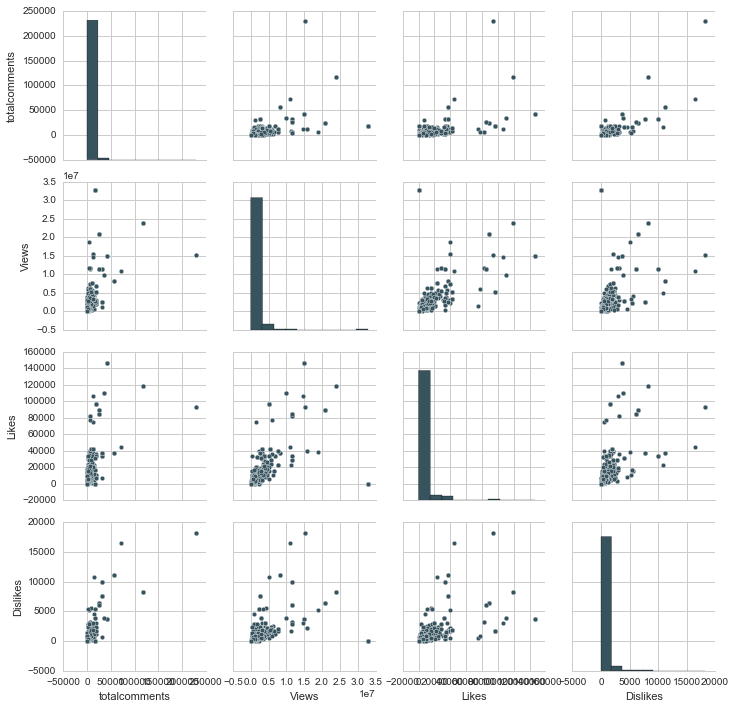

In [55]:
# This shows the relationships between the values.
sns.pairplot(newdf)

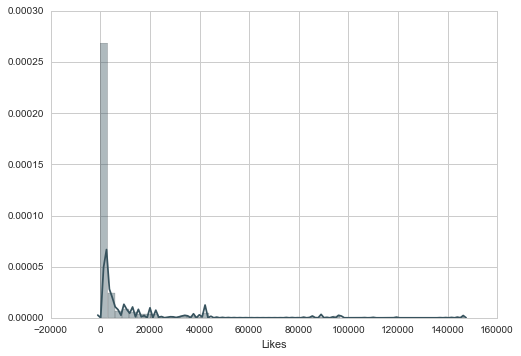

In [56]:
#  This shows the distribtuion of the likes.
sns.distplot(newdf['Likes'])

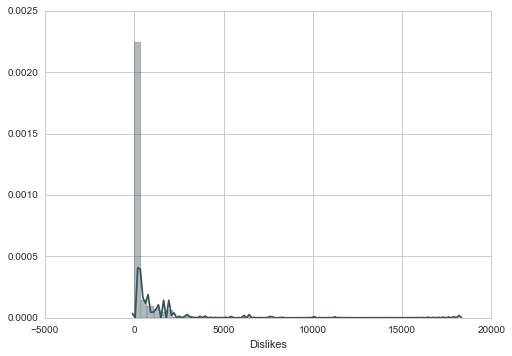

In [57]:
#  This shows the distribtuion of the Dislikes.
sns.distplot(newdf['Dislikes'])

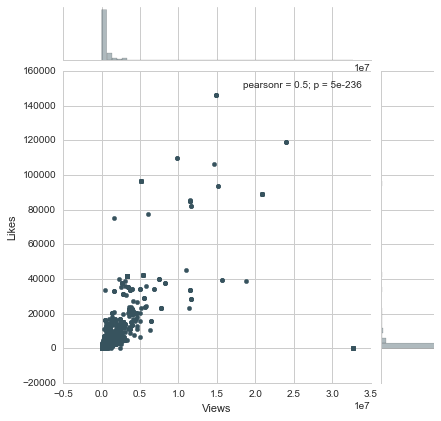

In [58]:
# Display likes vs views
sns.jointplot(x='Views',y='Likes',data=newdf)

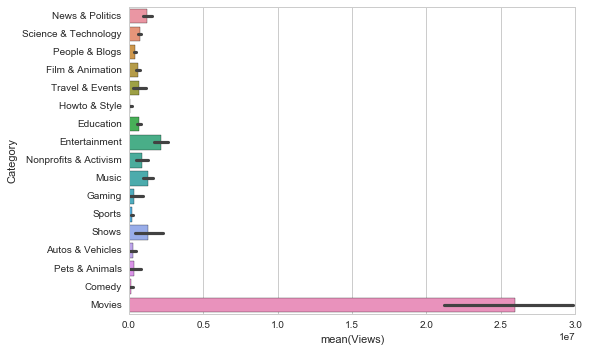

In [59]:
# check on category and number of views (mean value) 
sns.barplot(x='Views',y='Category',data=newdf)

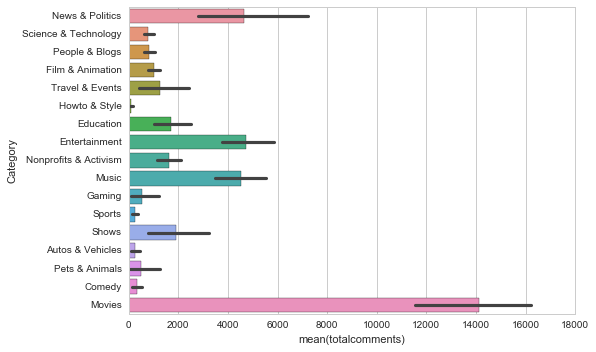

In [60]:
# check on category and level of comments (mean value) 
sns.barplot(x='totalcomments',y='Category',data=newdf)

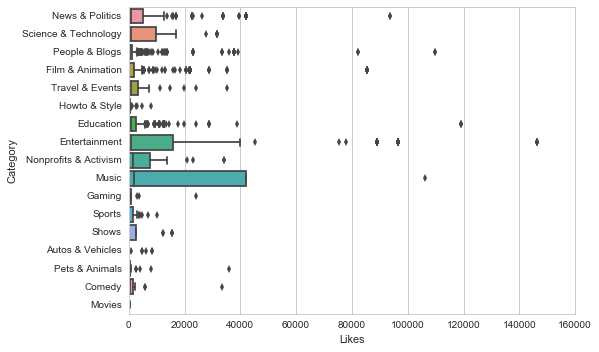

In [61]:
# Check on which category receives most likes (absolute values)

sns.boxplot(x='Likes',y='Category',data=newdf)

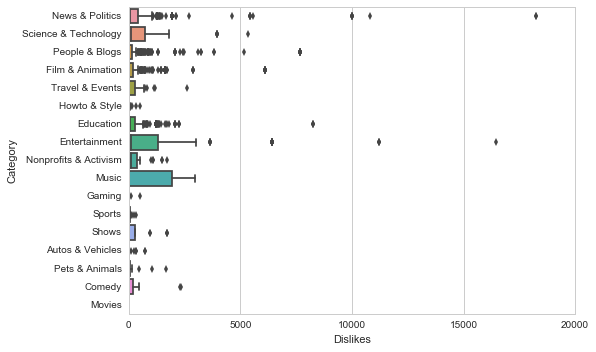

In [62]:
# Check on which category receives most dislikes

sns.boxplot(x='Dislikes',y='Category',data=newdf)

###  <a id="Section7"> Outliers</a>


In [63]:
# Dislikes
newdf.sort_values(by=['Dislikes'], ascending=[False])


totalcomments                                        Description  \
1369         229480  Get the DVD @\r\nhttp://infowars-shop.stores.y...   
3224         229535  Get the DVD @\r\nhttp://infowars-shop.stores.y...   
1343          71677  Like VICE News? Subscribe to our news channel:...   
2518          56550  Like VICE News? Subscribe to our news channel:...   
1323          56550  Like VICE News? Subscribe to our news channel:...   
1347          56550  Like VICE News? Subscribe to our news channel:...   
974           15771  SUBSCRIBE to the Barcroft network: http://bit....   
2575          31799  WATCH NOW - TERROR: The Islamic State: http://...   
1334          31798  WATCH NOW - TERROR: The Islamic State: http://...   
1887          31798  WATCH NOW - TERROR: The Islamic State: http://...   
1873          31798  WATCH NOW - TERROR: The Islamic State: http://...   
2849          31799  WATCH NOW - TERROR: The Islamic State: http://...   
1991         117565  Please support Peter Joseph's new, upcoming fi...   
3788         117568  Please support Peter Joseph's new, upcoming fi...   
2880         117565  Please support Peter Joseph's new, upcoming fi...   
3382          31923  BREXIT THE MOVIE is a feature-length documenta...   
3348          31923  BREXIT THE MOVIE is a feature-length documenta...   
3687          31923  BREXIT THE MOVIE is a feature-length documenta...   
3742          31923  BREXIT THE MOVIE is a feature-length documenta...   
2829          31918  BREXIT THE MOVIE is a feature-length documenta...   
2202          31918  BREXIT THE MOVIE is a feature-length documenta...   
1827          31918  BREXIT THE MOVIE is a feature-length documenta...   
2453          31918  BREXIT THE MOVIE is a feature-length documenta...   
2865          31918  BREXIT THE MOVIE is a feature-length documenta...   
2522          24724  VICE's Ryan Duffy went to Colombia to check ou...   
1319          24724  VICE's Ryan Duffy went to Colombia to check ou...   
1337          24724  VICE's Ryan Duffy went to Colombia to check ou...   
2554          24724  VICE's Ryan Duffy went to Colombia to check ou...   
2900          24724  VICE's Ryan Duffy went to Colombia to check ou...   
555           24723  VICE's Ryan Duffy went to Colombia to check ou...   
...             ...                                                ...   
2442              0  Subscribe for FREE MOVIES: https://www.youtube...   
2285              0  This documentary on IoT explores the obstacles...   
2441              0  Documentaries, subscribe for our canal:\r\nhtt...   
2439          17802  We are living in exceptional times. Scientists...   
216               3  The curse of the pharaohs refers to an alleged...   
498               4  Get 'Indian Armed Forces' T-shirt at http://fr...   
1372              0  Kenneth Turan's DVD Pick of the Week: Document...   
495              10  COSMETICOS LA VERDAD SOBRE LOS COSMETICOS DOCU...   
1373              0  Kenneth Turan's DVD Pick of the Week: Hollywoo...   
489               0  Documentaries, subscribe for our canal: About ...   
488               0  MOVIES CATEGORIES LIST: BEST DOCUMENTARYS - TO...   
3436             53  French Tanks of World War I\r\nWorld War 1 tan...   
486              22  SUPERDOTADOS GIFTED BEST DOCUMENTARIES VIDEO D...   
1889              4  Melt down oversights in the reactor cooling sy...   
2184              7  Amazing news and a new documentary! Subscribe ...   
2694             14                India In 1990"s - Hindi Documentary   
1477              0  Subscribe\r\n//#don't read this// \r\nbusiness...   
3428              5  Korean War - Military Documentary Films\r\n\r\...   
483               3  MÉXICO PROFUNDO CIVILIZACION OLVIDADA best doc...   
2692              0  From breaking news and intriguing historical d...   
2606              0  http://blackandwhiteflowerspictures.weebly.com...   
2510              9  LIKE****************SHARE****************COMME...   
2607      

In [64]:
# Likes
newdf.sort_values(by=['Likes'], ascending=[False])

totalcomments                                        Description  \
2707          42428  Like VICE News? Subscribe to our news channel:...   
2517          42428  Like VICE News? Subscribe to our news channel:...   
1518          42428  Like VICE News? Subscribe to our news channel:...   
1346          42428  Like VICE News? Subscribe to our news channel:...   
1314          42428  Like VICE News? Subscribe to our news channel:...   
3788         117568  Please support Peter Joseph's new, upcoming fi...   
2880         117565  Please support Peter Joseph's new, upcoming fi...   
1991         117565  Please support Peter Joseph's new, upcoming fi...   
2895          35144                     I don't own this video at all.   
2206          35143                     I don't own this video at all.   
3225          12232  Beyoncé's official documentary 'Year of 4'. "B...   
3740          18703  FREE TO PLAY is a feature-length documentary t...   
3674          18703  FREE TO PLAY is a feature-length documentary t...   
3157          18703  FREE TO PLAY is a feature-length documentary t...   
3766          18703  FREE TO PLAY is a feature-length documentary t...   
3644          18703  FREE TO PLAY is a feature-length documentary t...   
3720          18703  FREE TO PLAY is a feature-length documentary t...   
1820          18686  FREE TO PLAY is a feature-length documentary t...   
2613          18687  FREE TO PLAY is a feature-length documentary t...   
2244          18686  FREE TO PLAY is a feature-length documentary t...   
2631          18687  FREE TO PLAY is a feature-length documentary t...   
2820          18687  FREE TO PLAY is a feature-length documentary t...   
1185          18686  FREE TO PLAY is a feature-length documentary t...   
2384          18687  FREE TO PLAY is a feature-length documentary t...   
2868          18687  FREE TO PLAY is a feature-length documentary t...   
2475          18687  FREE TO PLAY is a feature-length documentary t...   
2215          18686  FREE TO PLAY is a feature-length documentary t...   
2192          18686  FREE TO PLAY is a feature-length documentary t...   
3224         229535  Get the DVD @\r\nhttp://infowars-shop.stores.y...   
1369         229480  Get the DVD @\r\nhttp://infowars-shop.stores.y...   
...             ...                                                ...   
850               0  46-XG-XJ 107.365 km \r\n  Prijs:     € 6.995\r...   
849               0  46-XG-XJ 107.365 km \r\n  Prijs:     € 7.495\r...   
848               0  55-ZL-JZ 66.847 km \r\n  Prijs:     € 13.945\r...   
1830              0  Serial killers, missing persons, spree killers...   
1631              0  Directed by Zachary Iscol. Available on iTunes...   
909               0  Part three of a 15-part series of documentarie...   
2870              0  national geographic specials\r\nnational geogr...   
3129              0  SEMPER FI... CHECK... CALL JOHN MELTON BRADY.....   
1530              0                   By Christ Rucinski & Dylan Zingg   
1531            271  This video is posted for Awareness and Educati...   
2862          17802  We are living in exceptional times. Scientists...   
1029              0  sexual/ moral degradation in Europe - document...   
3097              0  An inside look at the world of: Sexual Predato...   
2474              0  WEAPONS 4 SALE: how to film documentary - watc...   
3110              0  I'VE GOT PERSONAL DOCUMENTARIES OF MY... A HAN...   
2471              1                                                NaN   
1544              0  Choice TV broadcasts across New Zealand on Fre...   
1545              0                   50 הסרטים התיעודיים הטובים ביותר   
2470          17802  We are living in exceptional times. Scientists...   
2844              0  Video by Robin Wallace. Documentary i made a f...   
2318              0  BEST DOCUMENTARY SITE: cosmos international - ...   
2468              1                                                NaN   
1597      

In [145]:
# Comments
newdf.sort_values(by=['totalcomments'], ascending=[False]).head()


totalcomments                                        Description  \
3224         229535  Get the DVD @\r\nhttp://infowars-shop.stores.y...   
1369         229480  Get the DVD @\r\nhttp://infowars-shop.stores.y...   
3788         117568  Please support Peter Joseph's new, upcoming fi...   
2880         117565  Please support Peter Joseph's new, upcoming fi...   
1991         117565  Please support Peter Joseph's new, upcoming fi...   

      Duration                                              Title  \
3224  01:53:40         The Obama Deception HQ Full length version   
1369  01:53:40         The Obama Deception HQ Full length version   
3788  02:41:25  ZEITGEIST: MOVING FORWARD | OFFICIAL RELEASE |...   
2880  02:41:25  ZEITGEIST: MOVING FORWARD | OFFICIAL RELEASE |...   
1991  02:41:25  ZEITGEIST: MOVING FORWARD | OFFICIAL RELEASE |...   

                                             URL Upload_Date  \
3224  http://www.youtube.com/watch?v=eAaQNACwaLw  2009-03-13   
1369  http://www.youtube.com/watch?v=eAaQNACwaLw  2009-03-13   
3788  http://www.youtube.com/watch?v=4Z9WVZddH9w  2011-01-26   
2880  http://www.youtube.com/watch?v=4Z9WVZddH9w  2011-01-26   
1991  http://www.youtube.com/watch?v=4Z9WVZddH9w  2011-01-26   

                    User     Views         Category     Likes  Dislikes  \
3224     ChangeDaChannel  15087757  News & Politics   93630.0   18228.0   
1369     ChangeDaChannel  15086807  News & Politics   93623.0   18228.0   
3788  TZMOfficialChannel  23960205        Education  119160.0    8249.0   
2880  TZMOfficialChannel  23957935        Education  119154.0    8249.0   
1991  TZMOfficialChannel  23957935        Education  119152.0    8249.0   

                       keyword  lengthoftitle  
3224         dvd documentaries             42  
1369      documentaries on dvd             42  
3788     free documentary site             51  
2880  documentary website free             51  
1991  documentary film website             51

In [146]:
# Further EDA
# Fill in nans in Description col
newdf['Description']=newdf['Description'].fillna('No Description')

###  <a id="Section8">Other Noticable Discoveries</a>

In [147]:
# From the keywords analysed 1027 (roughly 25%) are in the people and blogs category.  
# I suggest any future documentaries should fit into this descriptor where appropriate
newdf['Category'].value_counts()

People & Blogs           1027
Film & Animation          756
Education                 536
Science & Technology      371
Entertainment             358
News & Politics           283
Music                     132
Nonprofits & Activism      66
Sports                     43
Howto & Style              42
Travel & Events            39
Movies                     34
Pets & Animals             34
Autos & Vehicles           34
Shows                      21
Comedy                     21
Gaming                     13
Name: Category, dtype: int64

In [148]:
# Display top youtubers.
#  This data could be used to model the strategies of the top documentary making youtubers.
newdf['User'].value_counts()

BestCar Test                                           133
Documentary Channel                                     88
Real Stories                                            57
Documentary Films                                       53
UFO Documentary Official                                52
Sirius Disclosure                                       52
VICE                                                    52
Top Documentaries                                       45
Movieclips Film Festivals & Indie Films                 42
Philly Blunt                                            40
hat soft                                                39
Documentary Films HD                                    35
DocuMentales COMPLETOS EN ESPAÑOL                       33
Documentaries Films                                     28
Educational Documentary                                 27
homeproject                                             27
WatchMojo.com                                           


###  <a id="Section9"> Linear Models</a>

Purpose:  The purpose of uing the linear model is to predict the amount of views a uploaded video will get based upon existing data.  I will use both SK learn and stats models and compare accordingly.

###### Via SKLearn

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [150]:
X = newdf [["totalcomments", "Likes", "Dislikes"]]
y = newdf['Views']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [152]:
# Fit the model

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

('MAE:', 809917.33898576652)
('MSE:', 9148270954461.3828)
('RMSE:', 3024610.8765362501)


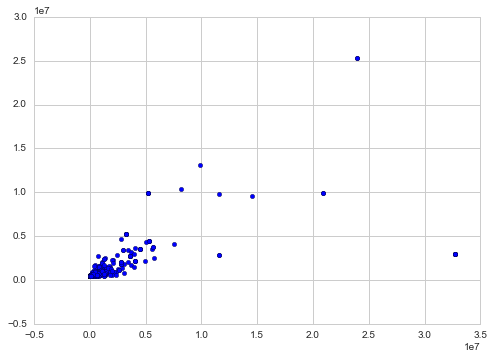

In [153]:
#  Predict values

predictions = lm.predict(X_test)

# plot
plt.scatter(y_test,predictions)


print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [154]:
# print the intercept
print("Intercept",lm.intercept_)


# create dataframe of coeffients
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print (coeff_df)

('Intercept', 425376.8185844369)
               Coefficient
totalcomments   143.688839
Likes            72.312031
Dislikes        -80.765331


###### Stats Models 

                            OLS Regression Results                            
Dep. Variable:                  Views   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     739.5
Date:                Wed, 25 Jan 2017   Prob (F-statistic):               0.00
Time:                        12:24:33   Log-Likelihood:                -61988.
No. Observations:                3810   AIC:                         1.240e+05
Df Residuals:                    3807   BIC:                         1.240e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
totalcomments   169.3377      9.938     17.039

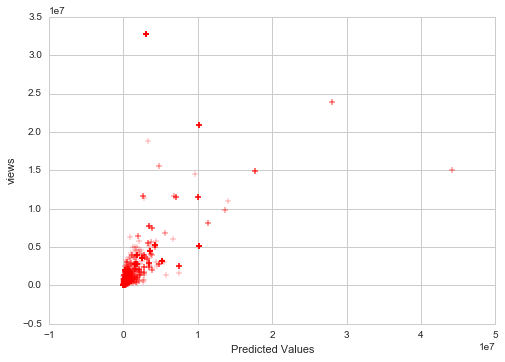

MSE: 5.87038855557e+15


In [155]:
import statsmodels.api as sm

X = newdf[["totalcomments", "Likes", "Dislikes"]]
y = newdf["Views"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print model.summary()

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("views")
plt.show()
print "MSE:", model.mse_model


###  <a id="Section10"> Text Analysis</a>

Purpose: To create a natural language classifer for the Title column.

In [156]:
#  From describe I check I have 192 keywords.
newdf['keyword'].describe()

count                        3810
unique                        192
top       free best documentaries
freq                           20
Name: keyword, dtype: object

In [157]:
newdf['lengthoftitle'] = newdf['Title'].apply(len)

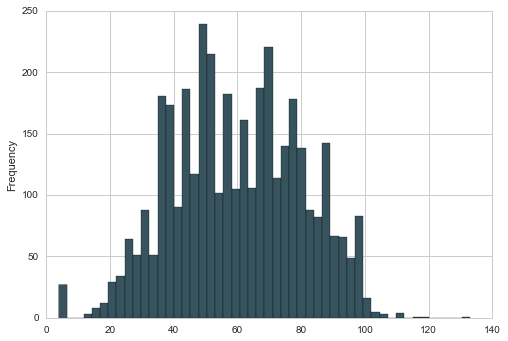

In [158]:
# Plot Histogram of title length (in Characters)
#  This shows a normal distribution 
newdf['lengthoftitle'].plot(bins=50, kind='hist') 

In [159]:
# Displays characteristics of title length.  I can see the minimum is 4, maximum is 133 with a mean of 60
newdf.lengthoftitle.describe()

count    3810.000000
mean       59.993701
std        20.219807
min         4.000000
25%        45.000000
50%        60.000000
75%        76.000000
max       133.000000
Name: lengthoftitle, dtype: float64

In [160]:
# Check title with 4 characters
newdf[newdf['lengthoftitle'] == 4]['Title'].iloc[0]


'HOME'

In [161]:
# Remove Punctuation

In [163]:
import string

mess = newdf['keyword']
# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [164]:
# Remove Stopwords (eg A, the, and)
from nltk.corpus import stopwords
clean_title = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [165]:
# sense check
clean_title

['2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentariesadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medic

In [166]:
# assign to dataframe
listofwords = pd.DataFrame({'clean_title': clean_title},index=clean_title)


###  <a id="Section11"> Word Cloud</a>

In [167]:
textforwc = listofwords['clean_title'].str.cat(sep=" ")

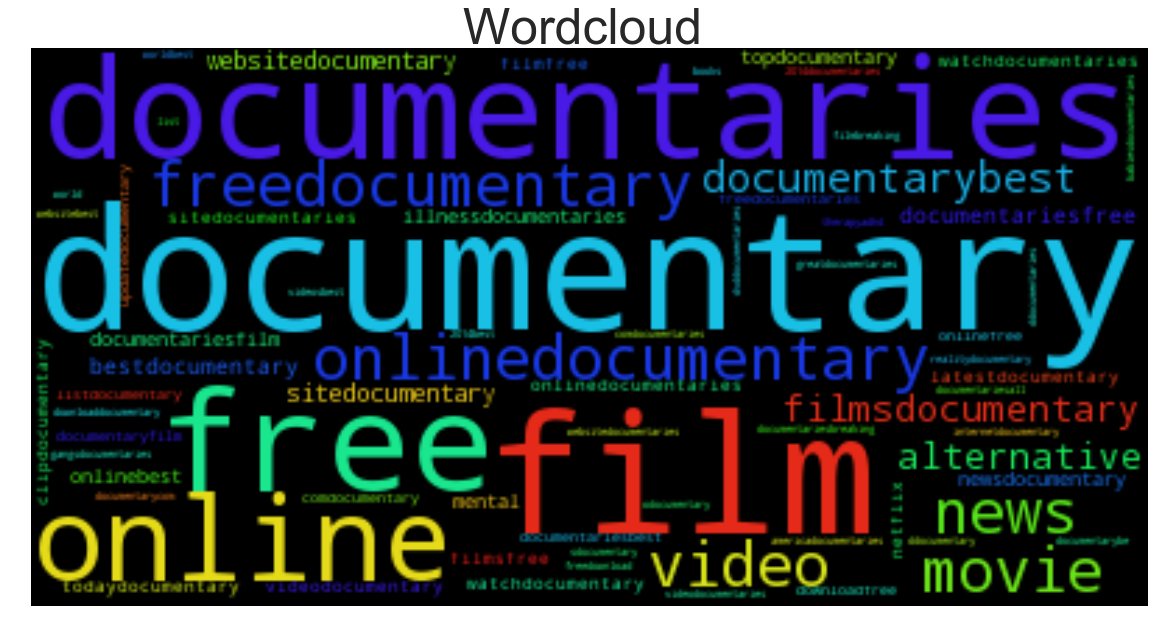

In [168]:
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read the whole text.
text = textforwc
wordcloud = WordCloud().generate(text)
# Open a plot of the generated image.

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title("Wordcloud ",fontsize=50, ha='center')

plt.axis("off")
plt.show()

In [169]:
# Check of most frequent words in title by value.  
listofwords['clean_title'].value_counts()

documentary                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [170]:
# Eliminate non words or numbers
import re
listofwords["clean_title"]=listofwords["clean_title"].apply(lambda x: re.sub(r'\W+', '', x))


In [171]:
clean_title

['2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentaries2015',
 'documentariesadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medicineadhd',
 'alternative',
 'medic

##### Count Vectorizer

In [172]:
from sklearn.feature_extraction.text import CountVectorizer

In [173]:
cvec = CountVectorizer()
cvec.fit(newdf['Title'])

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [174]:
cvec.get_feature_names()[0:3833]

[u'01',
 u'01of13',
 u'02',
 u'02of13',
 u'03',
 u'04',
 u'05',
 u'07',
 u'10',
 u'100',
 u'1000',
 u'101',
 u'101st',
 u'1080p',
 u'11',
 u'117',
 u'12',
 u'13',
 u'130',
 u'13th',
 u'14',
 u'15',
 u'15e',
 u'15lakhs',
 u'16',
 u'16th',
 u'16v',
 u'18',
 u'1812',
 u'186f',
 u'1914',
 u'1915',
 u'1919',
 u'1920',
 u'1929',
 u'1930',
 u'1933',
 u'1939',
 u'1940',
 u'1943',
 u'1944',
 u'1945',
 u'1946',
 u'1947',
 u'1950',
 u'1953',
 u'1957',
 u'1959',
 u'1960',
 u'1967',
 u'1971',
 u'1974',
 u'1976',
 u'1977',
 u'1978',
 u'1979',
 u'1982',
 u'1983',
 u'1984',
 u'1985',
 u'1990',
 u'1994',
 u'1995',
 u'1996',
 u'1997',
 u'1998',
 u'1999',
 u'1hr',
 u'1of2',
 u'20',
 u'200',
 u'2000',
 u'2001',
 u'2002',
 u'2003',
 u'2004',
 u'2005',
 u'2006',
 u'2007',
 u'2008',
 u'2009',
 u'2010',
 u'2011',
 u'2012',
 u'2013',
 u'2014',
 u'2015',
 u'2016',
 u'2017',
 u'2020',
 u'2050',
 u'20th',
 u'21',
 u'2100',
 u'21st',
 u'21th',
 u'22',
 u'229',
 u'23',
 u'24',
 u'24hrs',
 u'25',
 u'27',
 u'28',
 u'

In [175]:
cvc  = pd.DataFrame(cvec.transform(newdf['Title']).todense(), columns=cvec.get_feature_names())
cvc.transpose()[0].sort_values(ascending=False)[0:10]

auschwitz      1
documentary    1
2015           1
the            1
holocaust      1
exposure       0
extended       0
extinction     0
extra          0
穹顶之下           0
Name: 0, dtype: int64

### Progress Report 11 December 2016

#### I have doubled my data since the last iteration which was quite time consuming. This has also meant I have had to do further data cleaning.  I'm now happy with the number of records. My concern is that a number of records can be deemed duplicates (one appears 52 times).  This is because they are picked up on different keywords.  I could delete but feel this would discriminate my analysis.    I have fitted a linear model using both SK learn and Stats models.  My accruacy is very low so would like to pick up this week to see what I can do to improve.  I have started using NLP to assess the impact of certain keywords within the title.  This needs further work.


###  <a id="Section12"> NLP classification Model</a>

In [176]:
# Create column of length of Title.  If above 60 state 1 if below 60 then 0.
newdf.loc[newdf['lengthoftitle'] >= 60, 'alert'] = '1'
newdf.loc[newdf['lengthoftitle'] < 60, 'alert'] = '0'


In [177]:
newdf.corr()

totalcomments     Views     Likes  Dislikes  lengthoftitle
totalcomments       1.000000  0.536554  0.651967  0.800965      -0.201455
Views               0.536554  1.000000  0.496196  0.455009      -0.317883
Likes               0.651967  0.496196  1.000000  0.694263      -0.232130
Dislikes            0.800965  0.455009  0.694263  1.000000      -0.187558
lengthoftitle      -0.201455 -0.317883 -0.232130 -0.187558       1.000000

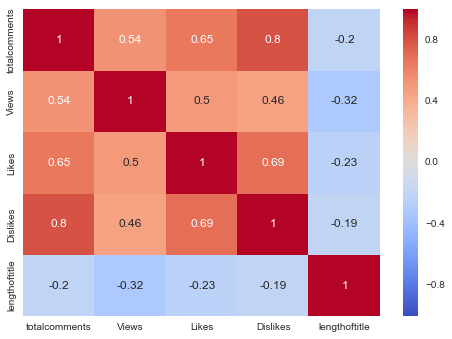

In [178]:
sns.heatmap(newdf.corr(),cmap='coolwarm',annot=True)

In [179]:
newdf.describe()

totalcomments         Views          Likes      Dislikes  lengthoftitle
count    3810.000000  3.810000e+03    3810.000000   3810.000000    3810.000000
mean     1878.558793  1.022160e+06    4617.342782    362.746982      59.993701
std      7849.117573  3.393037e+06   13793.502900   1096.032864      20.219807
min         0.000000  0.000000e+00       0.000000      0.000000       4.000000
25%         6.000000  1.348700e+04      46.000000      3.000000      45.000000
50%        89.000000  1.083645e+05     388.000000     29.000000      60.000000
75%       688.000000  6.782128e+05    2288.000000    228.750000      76.000000
max    229535.000000  3.271240e+07  146488.000000  18228.000000     133.000000

In [180]:
newdf['alert'] = newdf.alert.astype(int)


In [181]:
# Set objects for model
X = newdf['User']
y = newdf['alert']

###  <a id="Section13"> Logistic Regression Model</a>

In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()
tvec.fit(newdf["Title"])

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [183]:

# Preparing the data: feature selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newdf["Title"], newdf["alert"], test_size=0.33, random_state=42)

X_train_tfidf=pd.DataFrame(tvec.transform(X_train).todense(), columns=tvec.get_feature_names())
X_test_tfidf=pd.DataFrame(tvec.transform(X_test).todense(), columns=tvec.get_feature_names())

# Modelling based on those features and assess model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logit=LogisticRegression()
logit.fit(X_train_tfidf, y_train)
predictions=logit.predict(X_test_tfidf)
print("accuracy is", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print("remember the distribution is uneven at:")
print(y_test.value_counts())
print(classification_report(y_test,predictions))


('accuracy is', 0.82829888712241651)
[[545  82]
 [134 497]]
remember the distribution is uneven at:
1    631
0    627
Name: alert, dtype: int64


NameError: name 'classification_report' is not defined

###  <a id="Section14"> Bayes Model</a>

In [184]:
new_class = newdf[(newdf.alert==1) | (newdf.alert==0)]

In [185]:
new_class.describe()

totalcomments         Views          Likes      Dislikes  \
count    3810.000000  3.810000e+03    3810.000000   3810.000000   
mean     1878.558793  1.022160e+06    4617.342782    362.746982   
std      7849.117573  3.393037e+06   13793.502900   1096.032864   
min         0.000000  0.000000e+00       0.000000      0.000000   
25%         6.000000  1.348700e+04      46.000000      3.000000   
50%        89.000000  1.083645e+05     388.000000     29.000000   
75%       688.000000  6.782128e+05    2288.000000    228.750000   
max    229535.000000  3.271240e+07  146488.000000  18228.000000   

       lengthoftitle        alert  
count    3810.000000  3810.000000  
mean       59.993701     0.501837  
std        20.219807     0.500062  
min         4.000000     0.000000  
25%        45.000000     0.000000  
50%        60.000000     1.000000  
75%        76.000000     1.000000  
max       133.000000     1.000000

In [186]:
X = new_class['Title']
y = new_class['alert']

In [187]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [188]:
X = cv.fit_transform(X)

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [191]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [192]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [193]:
predictions = nb.predict(X_test)

In [194]:
from sklearn.metrics import confusion_matrix,classification_report

In [195]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print("accuracy is", accuracy_score(y_test, predictions))

[[433 114]
 [117 479]]


             precision    recall  f1-score   support

          0       0.79      0.79      0.79       547
          1       0.81      0.80      0.81       596

avg / total       0.80      0.80      0.80      1143

('accuracy is', 0.79790026246719159)



###  <a id="Section15"> TfidTransform</a>

In [196]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [197]:
from sklearn.pipeline import Pipeline

In [198]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [199]:
X = new_class['Title']
y = new_class['alert']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [200]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        str...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [201]:
predictions = pipeline.predict(X_test)

In [202]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("accuracy is", accuracy_score(y_test, predictions))

[[425 122]
 [ 98 498]]
             precision    recall  f1-score   support

          0       0.81      0.78      0.79       547
          1       0.80      0.84      0.82       596

avg / total       0.81      0.81      0.81      1143

('accuracy is', 0.80752405949256345)


###  <a id="Section16"> Review model and performance</a>

My model is based upon the number of characters in the video title.  I have created another column called alert where 'one' is greater than sixty characters.  'zero' is if the video has less than sixty characters.  Sixty charcters was chosen as it is 50% of the average title length.

I have used a logistic regression model giving an accruac of 83%
I then used a bayesian model above and received 80% performance. After using TFIDF this increased to 81%   


###  <a id="Section17"> Create targeted recommendations and next steps</a>

The next step is to work on improving the model using a cross validation approach.  I wanted to create several models and have a voting system to choose the best performer and decided to focus on improving the logisitc regression.

Some formating elements:  Create an Index,  label up graphs,  Tidy up headings.
